In [312]:
from fyers_api import accessToken
from fyers_api.Websocket import ws
import pandas as pd
from fyers_api import accessToken
from fyers_api import fyersModel
import os
import math
import datetime
import csv
import numpy as np

In [313]:
client_id='TAZ287TZUA-100'
secret_id='PPZ5ZG1YAR'
url='https://www.google.com/'
response_type = "code"
grant_type = "authorization_code"

In [314]:
session=accessToken.SessionModel(
    client_id=client_id,
    secret_key=secret_id,
    redirect_uri=url, 
    response_type=response_type,
    grant_type=grant_type
)

response = session.generate_authcode()
print(response)

https://api.fyers.in/api/v2/generate-authcode?client_id=TAZ287TZUA-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=None


In [315]:
auth_code='eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE2OTgzMTQxODcsImV4cCI6MTY5ODM0NDE4NywibmJmIjoxNjk4MzEzNTg3LCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYTTA0MzQyIiwib21zIjoiSzEiLCJoc21fa2V5IjoiNWI3Mzg3ZTYxOGQzODllNGVjOGVmZjU1ODM0ZTBmMTA1NjdjYWU1ODk5YWQ5NWY3MzgxMTM3YTMiLCJub25jZSI6IiIsImFwcF9pZCI6IlRBWjI4N1RaVUEiLCJ1dWlkIjoiZWQzMjY5NmVkNzNiNDdkNGIzZDU5NGRlN2MyMTUyMGIiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.W0siBOjhCyLFLTU72KsD8lqnMj7av3-H93BXJNQCbeo'

In [316]:
session.set_token(auth_code)
response = session.generate_token()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTgzMTQyMDUsImV4cCI6MTY5ODM2NjY0NSwibmJmIjoxNjk4MzE0MjA1LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbE9qZmRwODI0N0tpNi1aMXNzVGJremJqQkt5UDRwRjF0Y2xDYmIyWWNqaEh3MFFQUWtkUlJscWVDUFlqVjE1SEl6bkVRd0pXbVg4ZUdnOHJpdU5zOGl2aU9YTGIwck9XOHhrN1ZUcFRCZ1pJUnRYbz0iLCJkaXNwbGF5X25hbWUiOiJNT0hBTU1FRCBSQVlZQU4gU0FJVCIsIm9tcyI6IksxIiwiaHNtX2tleSI6IjViNzM4N2U2MThkMzg5ZTRlYzhlZmY1NTgzNGUwZjEwNTY3Y2FlNTg5OWFkOTVmNzM4MTEzN2EzIiwiZnlfaWQiOiJYTTA0MzQyIiwiYXBwVHlwZSI6MTAwLCJwb2FfZmxhZyI6Ik4ifQ.2qZOWnjeo58sFANaXzc1XKMlJdsUGa23Ic6MRUW45og', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTgzMTQyMDUsImV4cCI6MTY5OTU3NjI0NSwibmJmIjoxNjk4MzE0MjA1LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQU

In [317]:
access_token=response['access_token']

In [318]:
fyers=fyersModel.FyersModel(client_id=client_id,token=access_token,log_path=os.getcwd())

In [319]:
symbol="NSE:TCS-EQ"
data = {
    "symbol":symbol,
    "resolution":"5",
    "date_format":"1",
    "range_from":"2023-10-26",
    "range_to":"2023-10-26",
    "cont_flag":"1"
}

response = fyers.history(data=data)
print(response)

{'s': 'ok', 'candles': [[1698291900, 3368.05, 3373.7, 3362.35, 3363.95, 80833], [1698292200, 3363.9, 3365.95, 3356.0, 3358.15, 43763], [1698292500, 3358.05, 3362.7, 3358.05, 3359.2, 44434], [1698292800, 3359.4, 3367.75, 3359.2, 3367.75, 34557], [1698293100, 3367.8, 3372.0, 3360.0, 3361.1, 39649], [1698293400, 3361.1, 3362.2, 3352.95, 3354.4, 43294], [1698293700, 3354.2, 3359.65, 3351.5, 3359.6, 26300], [1698294000, 3359.6, 3363.65, 3359.0, 3361.5, 21002], [1698294300, 3361.5, 3364.0, 3360.05, 3362.4, 26624], [1698294600, 3362.4, 3363.1, 3356.0, 3357.1, 46359], [1698294900, 3357.35, 3358.35, 3353.8, 3356.55, 23935], [1698295200, 3356.2, 3361.0, 3354.0, 3355.4, 24667], [1698295500, 3355.5, 3356.45, 3351.0, 3353.05, 23293], [1698295800, 3352.75, 3353.7, 3346.0, 3347.05, 37973], [1698296100, 3347.05, 3348.9, 3345.6, 3346.85, 13835], [1698296400, 3347.5, 3348.65, 3345.0, 3346.1, 26564], [1698296700, 3346.1, 3347.15, 3341.6, 3344.25, 23139], [1698297000, 3344.25, 3346.5, 3342.6, 3344.5, 2061

In [320]:
candleSticks=response['candles']


In [321]:
closingValues=[]
candleSticksForDF=[]
for item in candleSticks:
    candleSticksForDF.append(item)
    closingValues.append(item[4])

In [322]:
valuesToPlot={'closingValues':closingValues,'candleStick':candleSticksForDF}
df = pd.DataFrame(valuesToPlot)
df

,closingValues,candleStick
0,3363.95,"[1698291900, 3368.05, 3373.7, 3362.35, 3363.95..."
1,3358.15,"[1698292200, 3363.9, 3365.95, 3356.0, 3358.15,..."
2,3359.20,"[1698292500, 3358.05, 3362.7, 3358.05, 3359.2,..."
3,3367.75,"[1698292800, 3359.4, 3367.75, 3359.2, 3367.75,..."
4,3361.10,"[1698293100, 3367.8, 3372.0, 3360.0, 3361.1, 3..."
...,...,...
70,3337.15,"[1698312900, 3337.55, 3338.0, 3333.05, 3337.15..."
71,3337.45,"[1698313200, 3337.2, 3337.85, 3333.85, 3337.45..."
72,3336.85,"[1698313500, 3338.0, 3340.25, 3335.25, 3336.85..."
73,3337.95,"[1698313800, 3336.9, 3339.45, 3336.05, 3337.95..."


In [323]:
small_lookback = 5
df['mean'] = df['closingValues'].ewm(span=5).mean()

In [324]:
import pandas as pd

# Assuming you have your price data in a DataFrame 'df' under the 'candleStick' column

# Define the window and standard deviation multiplier
window = 10  # You can adjust this window size as needed
std_dev_multiplier = 1.5  # Multiplier for standard deviation

# Calculate the rolling mean (SMA) and rolling standard deviation
df['SMA'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).mean()
df['StdDev'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = df['SMA'] + (std_dev_multiplier * df['StdDev'])
df['Lower_Band'] = df['SMA'] - (std_dev_multiplier * df['StdDev'])

# Print the resulting DataFrame 'df' with Bollinger Bands
print(df)


    closingValues                                        candleStick  \
0         3363.95  [1698291900, 3368.05, 3373.7, 3362.35, 3363.95...   
1         3358.15  [1698292200, 3363.9, 3365.95, 3356.0, 3358.15,...   
2         3359.20  [1698292500, 3358.05, 3362.7, 3358.05, 3359.2,...   
3         3367.75  [1698292800, 3359.4, 3367.75, 3359.2, 3367.75,...   
4         3361.10  [1698293100, 3367.8, 3372.0, 3360.0, 3361.1, 3...   
..            ...                                                ...   
70        3337.15  [1698312900, 3337.55, 3338.0, 3333.05, 3337.15...   
71        3337.45  [1698313200, 3337.2, 3337.85, 3333.85, 3337.45...   
72        3336.85  [1698313500, 3338.0, 3340.25, 3335.25, 3336.85...   
73        3337.95  [1698313800, 3336.9, 3339.45, 3336.05, 3337.95...   
74        3337.90  [1698314100, 3337.85, 3337.95, 3337.2, 3337.9,...   

           mean       SMA    StdDev   Upper_Band   Lower_Band  
0   3363.950000       NaN       NaN          NaN          NaN  
1   336

In [325]:
import pandas as pd
import numpy as np


def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
    """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
        The TradingView code is as follows:
        //@version=4
        study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
        len = input(14, minval=1, title="Length")
        src = input(close, "Source", type = input.source)
        up = rma(max(change(src), 0), len)
        down = rma(-min(change(src), 0), len)
        rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
        plot(rsi, "RSI", color=#8E1599)
        band1 = hline(70, "Upper Band", color=#C0C0C0)
        band0 = hline(30, "Lower Band", color=#C0C0C0)
        fill(band1, band0, color=#9915FF, transp=90, title="Background")

    :param ohlc:
    :param period:
    :param round_rsi:
    :return: an array with the RSI indicator values
    """

    delta = ohlc["closingValues"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi

In [326]:
import pandas as pd




def stoch_rsi_tradingview(ohlc: pd.DataFrame, period=14, smoothK=3, smoothD=3):
    """ Calculating Stochastic RSI (gives the same values as TradingView as of March 20, 2021.
        smoothK = input(3, "K", minval=1)
        smoothD = input(3, "D", minval=1)
        lengthRSI = input(14, "RSI Length", minval=1)
        lengthStoch = input(14, "Stochastic Length", minval=1)
        src = input(close, title="RSI Source")
        rsi1 = rsi(src, lengthRSI)
        k = sma(stoch(rsi1, rsi1, rsi1, lengthStoch), smoothK)
        d = sma(k, smoothD)

    :param ohlc:
    :param period:
    :param smoothK:
    :param smoothD:
    :return:
    """
    # Calculate RSI
    rsi = rsi_tradingview(ohlc, period=period, round_rsi=False)

    # Calculate StochRSI
    rsi = pd.Series(rsi)
    stochrsi  = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())
    stochrsi_K = stochrsi.rolling(smoothK).mean()
    stochrsi_D = stochrsi_K.rolling(smoothD).mean()
    df['stochrsi_K']=round(stochrsi_K * 100, 2)
    df['stochrsi_D']=round(stochrsi_D * 100, 2)
    return round(rsi, 2), round(stochrsi_K * 100, 2), round(stochrsi_D * 100, 2)

In [327]:
stoch_rsi_tradingview(df)

(0       NaN
 1      0.00
 2     16.32
 3     65.57
 4     43.92
       ...  
 70    41.57
 71    42.14
 72    41.27
 73    43.57
 74    43.48
 Length: 75, dtype: float64,
 0      NaN
 1      NaN
 2      NaN
 3      NaN
 4      NaN
       ... 
 70    5.81
 71    1.60
 72    1.60
 73    6.25
 74    9.50
 Length: 75, dtype: float64,
 0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
       ...  
 70    26.32
 71    11.80
 72     3.00
 73     3.15
 74     5.78
 Length: 75, dtype: float64)

In [328]:
df['stochrsi_D'][17]

nan

In [329]:
counter=0
buyPrice=-420
stopLoss=-420
reward=3
buying=0
slCounter=0
tpCounter=0
eodCounter=0
stopLossCounterForDay=0
for index, row in df.iterrows():
    #Prints the number of times Stop loss is hit in a day
    if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
        print('StopLoss on '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]))+' hit '+str(stopLossCounterForDay)+' times')
        stopLossCounterForDay=0
    #Sells everything if already bought a stock EOD
    if(buying==1):
        if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time().hour)=='15' and str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time().minute)>='15'):
            
            print(symbol+' EOD Exit at '+str(df['candleStick'][index][4]))
            eodCounter=eodCounter+((df['candleStick'][index][4]-buyPrice)/(buyPrice-stopLoss))
            counter=0
            buyPrice=-420
            stopLoss=-420
            reward=3
            buying=0
    if(stopLossCounterForDay<2):
        if not math.isnan(df['mean'][index] ):
            if not((df['mean'][index]<= df['candleStick'][index][2]) and (df['mean'][index]>= df['candleStick'][index][3])):
                #Checks for reference candles
                if(buying!=1):
                    if(df['mean'][index]>df['candleStick'][index][2] and df['Lower_Band'][index]>=df['candleStick'][index][3]):
                        print(symbol+' Reference Candle '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buyPrice=df['candleStick'][index][2]
                        stopLoss=df['candleStick'][index][3]-0.2
            else:
                if(buyPrice!=-420 and stopLoss!=-420):
                    #Buy Order
                    if(buying==0):
                        print(symbol+' Buy Triggered at '+str(buyPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buying=1
                    #stoploss hit    
                    if(df['candleStick'][index][3]<=stopLoss):
                        print(symbol+' SL hit at '+str(stopLoss)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        stopLossCounterForDay=stopLossCounterForDay+1
                        buying=0
                        buyPrice=-420
                        stopLoss=-420
                        slCounter=slCounter+1
                        continue
                    targetPrice=buyPrice+((buyPrice-stopLoss)*reward)
                    #Sells if made more then 1:3 and meets stochrsi indicator condition
                    if(df['candleStick'][index][2]>=targetPrice and df['stochrsi_K'][index]<=df['stochrsi_D'][index]):
                        
                        buying=0
                        print(symbol+' TP hit at '+str(df['candleStick'][index][4])+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        #tpCounter=tpCounter+1
                        tpCounter=tpCounter+((df['candleStick'][index][4]-buyPrice)/(buyPrice-stopLoss))
                        buyPrice=-420
                        stopLoss=-420
      
print('TP:'+str(tpCounter))
print('SL:'+str(slCounter*-1))
roundValueForEOD=round(eodCounter,3)
print('EOD:'+str(roundValueForEOD))
roundValueForNet=round(((tpCounter)+(slCounter*-1)+(eodCounter)),3)
print('Net For Period='+ str(roundValueForNet))


NSE:TCS-EQ Reference Candle 2023-10-26 10:05:00
NSE:TCS-EQ Buy Triggered at 3358.35 2023-10-26 10:10:00
NSE:TCS-EQ SL hit at 3353.6000000000004 2023-10-26 10:15:00
NSE:TCS-EQ Reference Candle 2023-10-26 10:25:00
NSE:TCS-EQ Reference Candle 2023-10-26 10:30:00
NSE:TCS-EQ Reference Candle 2023-10-26 10:35:00
NSE:TCS-EQ Buy Triggered at 3347.15 2023-10-26 10:45:00
NSE:TCS-EQ SL hit at 3341.4 2023-10-26 10:50:00
StopLoss on 2023-10-26 15:15:00 hit 2 times
TP:0
SL:-2
EOD:0
Net For Period=-2


<Axes: >

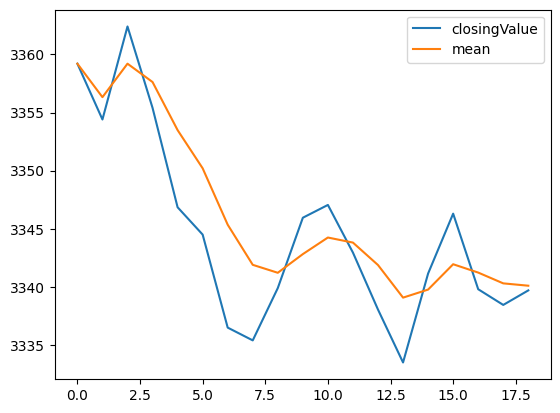

In [289]:
objForGraph={'closingValue':df['closingValues'],'mean':df['mean']}
dfToPlot = pd.DataFrame(objForGraph)
dfToPlot.plot()
